In [7]:
import os
import pickle

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
PICKLE_DIR = "urbansounds_pickles" 

In [3]:
X_train = pickle.load(open(os.path.join(PICKLE_DIR,"X_train.pickle"), "rb"))
y_train = pickle.load(open(os.path.join(PICKLE_DIR,"y_train.pickle"), "rb"))

X_val = pickle.load(open(os.path.join(PICKLE_DIR,"X_val.pickle"), "rb"))
y_val = pickle.load(open(os.path.join(PICKLE_DIR,"y_val.pickle"), "rb"))

X_test = pickle.load(open(os.path.join(PICKLE_DIR,"X_test.pickle"), "rb"))
y_test = pickle.load(open(os.path.join(PICKLE_DIR,"y_test.pickle"), "rb"))

In [4]:
X_train[0].shape

(128, 96, 1)

In [5]:
# IMG_SIZE = 256
NUM_CLASSES = 10
INPUT_SHAPE = X_train[0].shape

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

Epoch 1/20
188/188 [==============================] - 57s 305ms/step - loss: 1.5364 - accuracy: 0.4342 - val_loss: 10.9554 - val_accuracy: 0.0000e+00
Epoch 2/20
188/188 [==============================] - 57s 304ms/step - loss: 0.8856 - accuracy: 0.6797 - val_loss: 12.4897 - val_accuracy: 0.0000e+00
Epoch 3/20
188/188 [==============================] - 56s 300ms/step - loss: 0.6841 - accuracy: 0.7620 - val_loss: 14.2298 - val_accuracy: 0.0000e+00
Epoch 4/20
188/188 [==============================] - 59s 312ms/step - loss: 0.5412 - accuracy: 0.8165 - val_loss: 13.7406 - val_accuracy: 0.0000e+00
Epoch 5/20
188/188 [==============================] - 56s 298ms/step - loss: 0.4461 - accuracy: 0.8487 - val_loss: 18.6600 - val_accuracy: 0.0000e+00
Epoch 6/20
188/188 [==============================] - 58s 311ms/step - loss: 0.3441 - accuracy: 0.8793 - val_loss: 21.3792 - val_accuracy: 0.0000e+00
Epoch 7/20
188/188 [==============================] - 58s 310ms/step - loss: 0.3018 - accuracy: 0.89

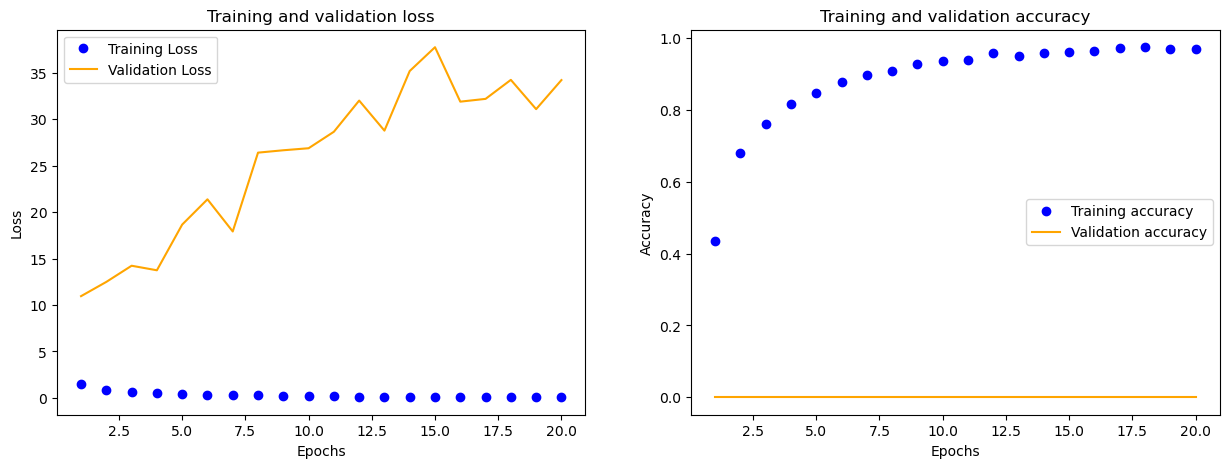

In [15]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,21)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()